# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [5]:
feature_names = []
with open('/home/ray/MIDS/w207-hw/raybuhr-hw_1/Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [6]:
X, Y = [], []

with open('/home/ray/MIDS/w207-hw/raybuhr-hw_1/Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [7]:
def P1():
### STUDENT START ###
    comps = range(1,51)
    for n in comps:
        pca_model = PCA(n_components=n)
        pca_model.fit(train_data)
        
        print 'k =', n
        print 'Explained variance ratio: \n', pca_model.explained_variance_ratio_ 
        print 'Cumulative explained variance: \n', np.cumsum(pca_model.explained_variance_ratio_)
        
### STUDENT END ###

P1()

k = 1
Explained variance ratio: 
[ 0.16404331]
Cumulative explained variance: 
[ 0.16404331]
k = 2
Explained variance ratio: 
[ 0.16404331  0.13323479]
Cumulative explained variance: 
[ 0.16404331  0.2972781 ]
k = 3
Explained variance ratio: 
[ 0.16404331  0.13323479  0.10173457]
Cumulative explained variance: 
[ 0.16404331  0.2972781   0.39901267]
k = 4
Explained variance ratio: 
[ 0.16404331  0.13323479  0.10173457  0.07063356]
Cumulative explained variance: 
[ 0.16404331  0.2972781   0.39901267  0.46964623]
k = 5
Explained variance ratio: 
[ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646]
Cumulative explained variance: 
[ 0.16404331  0.2972781   0.39901267  0.46964623  0.50831269]
k = 6
Explained variance ratio: 
[ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804]
Cumulative explained variance: 
[ 0.16404331  0.2972781   0.39901267  0.46964623  0.50831269  0.54512074]
k = 7
Explained variance ratio: 
[ 0.16404331  0.13323479  0.10173457  0.07063356 

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

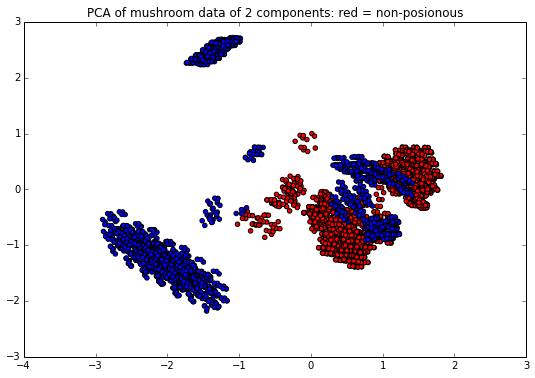

In [8]:
def P2():
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_2 = pca_model.fit(train_data).transform(train_data)
    
    plt.figure(figsize=(9, 6))
    for c, i, label in zip("rb", [0, 1], train_labels):
        plt.scatter(pca_2[train_labels == i, 0], pca_2[train_labels == i, 1], c=c, label=label)
    plt.title('PCA of mushroom data of 2 components: red = non-posionous')

### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

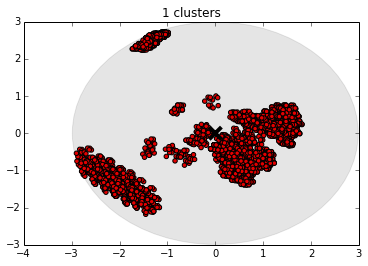

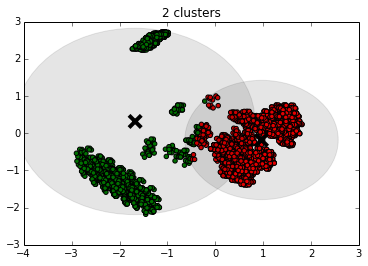

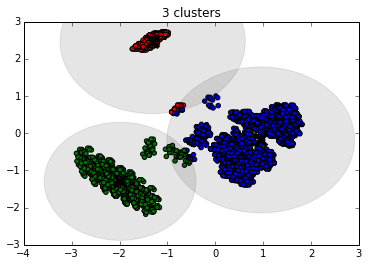

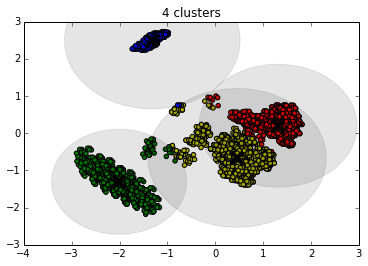

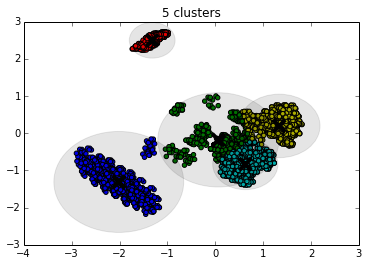

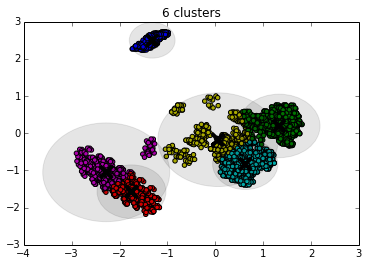

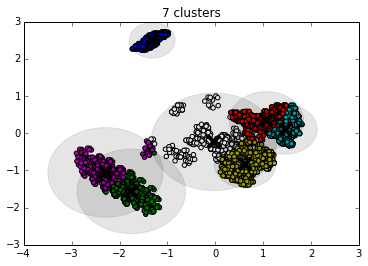

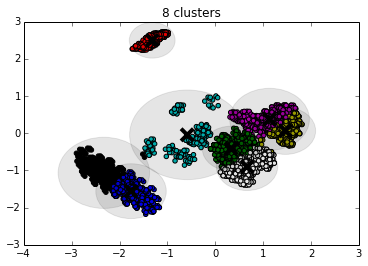

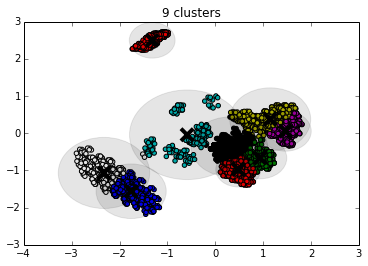

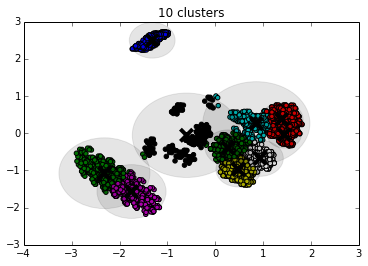

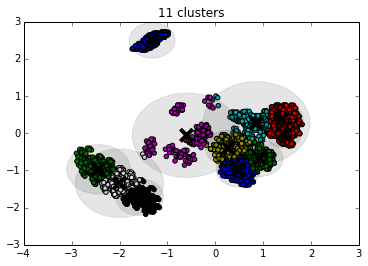

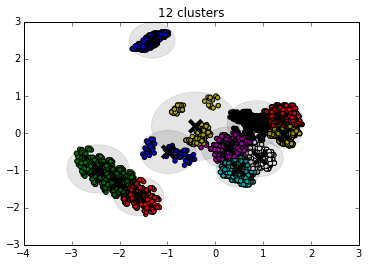

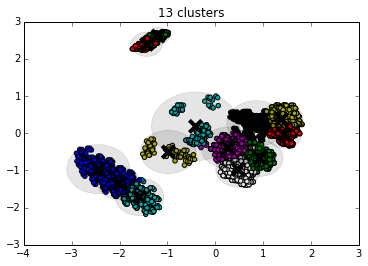

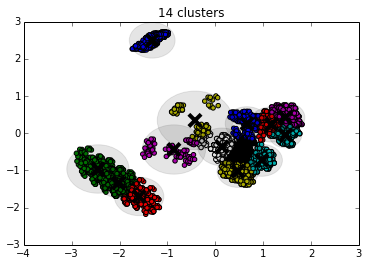

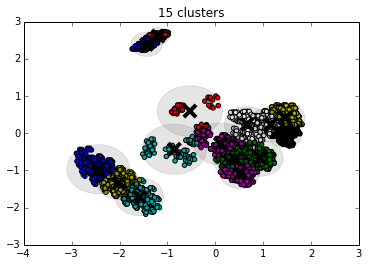

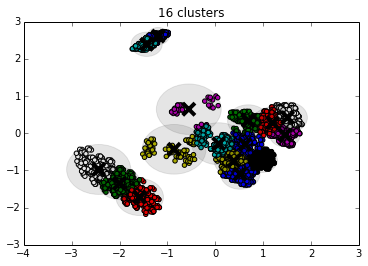

In [25]:
def P3(N):
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_2 = pca_model.fit(train_data).transform(train_data)
    
    km = KMeans(n_clusters=N, init='k-means++')
    clstrs = km.fit(pca_2)
    
    myColors = ('r.','g.','b.','y.', 
                'c.', 'm.', 'w.', 'k.',
                'red','green','blue','yellow', 
                'cyan', 'magenta', 'white', 'black'
               )
    
    # loop through myColors and apply for each new cluster introduced
    myClCols = np.empty(pca_2.shape[0], 'string')
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols[ii] = myColors[color_index]

    plt.figure(figsize = (6, 4))
    plt.scatter (pca_2[:,0], pca_2[:,1], c = myClCols)
    
    # plot centroid of each cluster as X    
    plt.scatter(clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = 'k', s = 150, marker = 'x',
                linewidths = 4)
    
    # plot circle around each centroid showing size of cluster
    # calculated as euclidean distance between center and outer most point
    
    '''
    # this represents the first method I used to calculate euclidean distance
    # I tried using the kmeans method transform, but the distances for each
    # cluster did not look right...
    
    distances = km.transform(pca_2)
        
    for cent in range(N):
        max_dist = np.amax(distances[:, cent][cent])
        circ = plt.Circle(clstrs.cluster_centers_[cent], 
                          max_dist, # find euclidean distance between centroid and max
                          color='k', fill=False)
        print 'distance=', max_dist
        print 'center=', clstrs.cluster_centers_[cent]
        plt.gca().add_artist(circ)
    '''

    # this represents the second method I used to calculate euclidean distance (ED)
    # I loop through each cluster and create the centroids
    # then create max distance coordinates using the formula for ED
    
    for ci in np.unique(clstrs.labels_):
        cur_vals = pca_2[np.where(clstrs.labels_== ci)[0]]
        cx, cy = clstrs.cluster_centers_[ci][0], clstrs.cluster_centers_[ci][1]
        dx, dy = np.subtract(cur_vals[:,0],cx)**2, np.subtract(cur_vals[:,1],cy)**2
        dist = np.add(dx, dy)**(0.5)
        r = np.max(dist)
        cir = plt.Circle((cx,cy), radius=r, alpha =.1, fc='k')
        plt.gca().add_patch(cir)    
    
    
    plt.title (str(N) + " clusters")  
    plt.show()
    print '\n'
        
### STUDENT END ###
for i in range(1,17):
    P3(i)

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

1 components, spherical


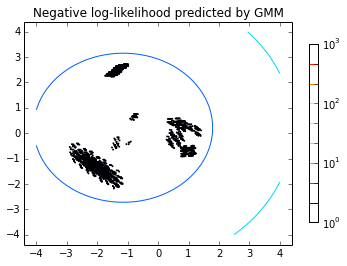

1 components, diag


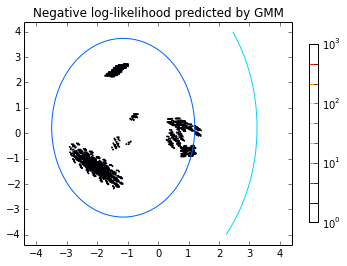

1 components, tied


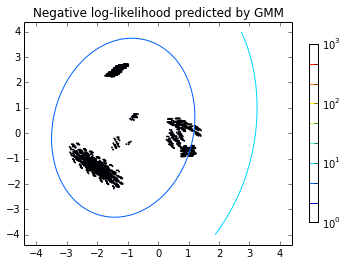

1 components, full


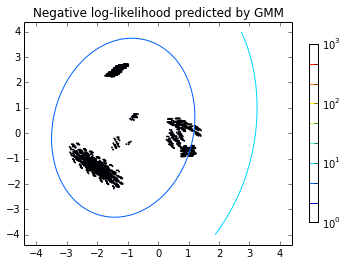

2 components, spherical


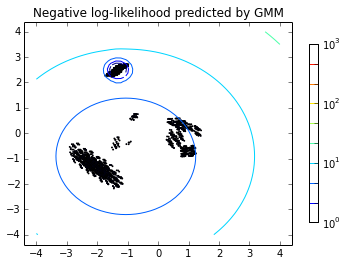

2 components, diag


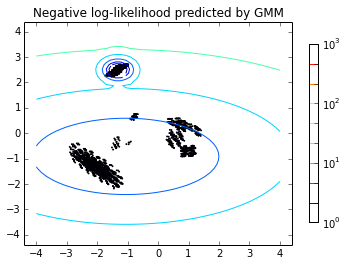

2 components, tied


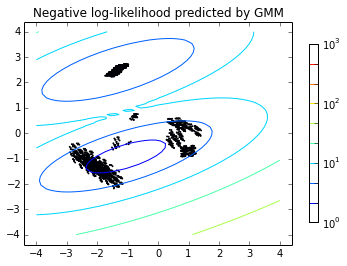

2 components, full


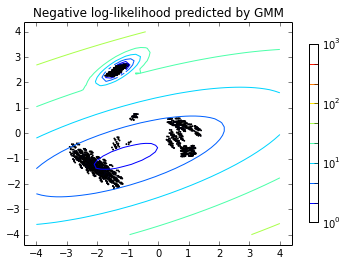

3 components, spherical


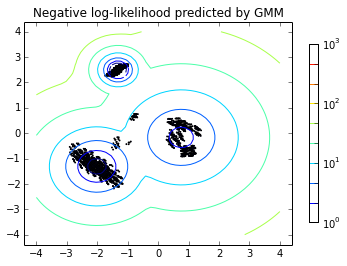

3 components, diag


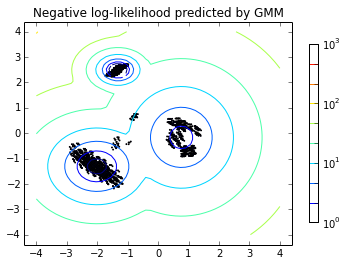

3 components, tied


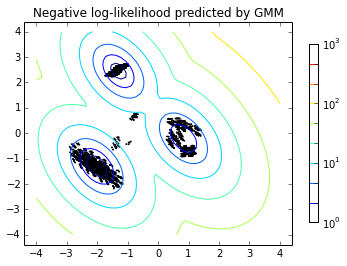

3 components, full


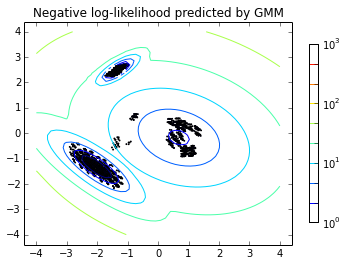

4 components, spherical


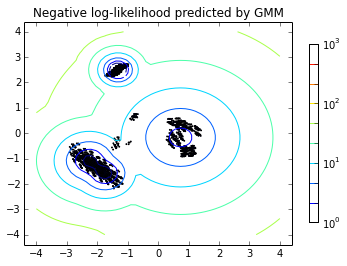

4 components, diag


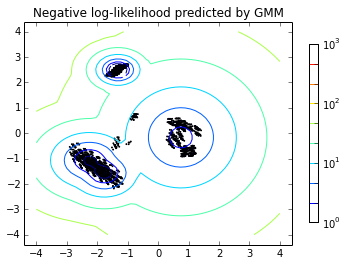

4 components, tied


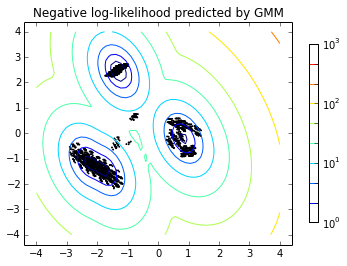

4 components, full


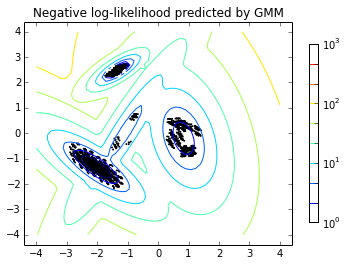

In [26]:
def P4():
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_2 = pca_model.fit(train_data).transform(train_data)
    pos_pca = pca_2[train_labels == 1]
    components = range(1,5)
    cov_type = ['spherical', 'diag', 'tied', 'full']

    for i in components:
        for j in range(len(cov_type)):
            gmm_model = GMM(n_components=i, covariance_type=cov_type[j])
            gmm_model.fit(pos_pca)
            x = np.linspace(-4.0, 4.0)
            y = np.linspace(-4.0, 4.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm_model.score_samples(XX)[0]
            Z = Z.reshape(X.shape)
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(pos_pca[:,0], pos_pca[:,1], 0.8)
            print str(i) + ' components, ' + str(cov_type[j])
            plt.title('Negative log-likelihood predicted by GMM')
            plt.show()

### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [89]:
def P5():
### STUDENT START ###
    pca_model = PCA(n_components=2)
    pca_train = pca_model.fit(train_data).transform(train_data)
    pos_pca = pca_train[train_labels == 1]
    neg_pca = pca_train[train_labels == 0]
    
    gmm_pos = GMM(n_components=4, covariance_type='full', random_state=50)
    gmm_pos.fit(pos_pca)
    
    gmm_neg = GMM(n_components=4, covariance_type='full', random_state=50)
    gmm_neg.fit(neg_pca)
    
    pca_test = pca_model.transform(test_data)
    pos_scores = gmm_pos.score(pca_test)
    neg_scores = gmm_neg.score(pca_test)
    predict_labels = (pos_scores >= neg_scores).astype(int)


    pos_predict = gmm_pos.predict(pca_test)
    neg_predict = gmm_neg.predict(pca_test)
         
    pos_acc = np.mean(pos_predict.ravel() == test_labels.ravel())
    neg_acc = np.mean(neg_predict.ravel() == test_labels.ravel())
    net_acc = np.mean(predict_labels == test_labels)
    
    print "positive model accuracy =", pos_acc
    print 'negative model accuracy =', neg_acc 
    print 'higher score model accuracy =', net_acc


### STUDENT END ###

P5()

positive model accuracy = 0.218861209964
negative model accuracy = 0.166370106762
higher score model accuracy = 0.951067615658


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [109]:
def P6():
### STUDENT START ###
    pca_components = range(1,51)
    gmm_components = range(1,201)
    cov_types = ['spherical', 'diag', 'tied', 'full']
    
    # loop through covariance types separately since they have different parameter calculations
    # Spherical
    spher_results = []
    for i in pca_components:
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        for j in gmm_components:
            parameters = (i+1)*j*2
            if parameters > 50:
                pass
            else:             
                gmm_model = GMM(n_components=j, covariance_type='spherical')
                gmm_model.fit(pca_train)
                pca_test = pca_model.transform(test_data)
                predictions = gmm_model.predict(pca_test)
                accuracy = np.mean(predictions.ravel() == test_labels.ravel())
                #print 'PCA Components =', i, '; GMM Components =', j, '; Coviance Type =', k
                #print 'Accuracy =', accuracy, '; Parameters =', parameters, '\n'
                spher_results.append([accuracy, i, j, parameters])
    spher_results = np.array(spher_results)
    max_accuracy = np.amax(spher_results[:,0])
    print 'Spherical max accuracy with < 50 parameters =', max_accuracy
    
    # Diagonal
    diag_results = []
    for i in pca_components:
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        for j in gmm_components:
            parameters = (i+i)*j*2            
            if parameters > 50:
                pass
            else:            
                gmm_model = GMM(n_components=j, covariance_type='diag')
                gmm_model.fit(pca_train)
                pca_test = pca_model.transform(test_data)
                predictions = gmm_model.predict(pca_test)
                accuracy = np.mean(predictions.ravel() == test_labels.ravel())
                #print 'PCA Components =', i, '; GMM Components =', j, '; Coviance Type =', k
                #print 'Accuracy =', accuracy, '; Parameters =', parameters, '\n'
                diag_results.append([accuracy, i, j, parameters])
    diag_results = np.array(diag_results)
    max_accuracy = np.amax(diag_results[:,0])
    print 'Diagonal max accuracy with < 50 parameters =', max_accuracy
    
    # Tied
    tied_results = []
    for i in pca_components:
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        for j in gmm_components:
            parameters = (i+i*(i-1)/2)*j*2
            if parameters > 50:
                pass
            else:
                gmm_model = GMM(n_components=j, covariance_type='tied')
                gmm_model.fit(pca_train)
                pca_test = pca_model.transform(test_data)
                predictions = gmm_model.predict(pca_test)
                accuracy = np.mean(predictions.ravel() == test_labels.ravel())
                #print 'PCA Components =', i, '; GMM Components =', j, '; Coviance Type =', k
                #print 'Accuracy =', accuracy, '; Parameters =', parameters, '\n'
                tied_results.append([accuracy, i, j, parameters])
    tied_results = np.array(tied_results)
    max_accuracy = np.amax(tied_results[:,0])
    print 'Tied max accuracy with < 50 parameters =', max_accuracy

    
    # Full
    full_results = []
    for i in pca_components:
        pca_model = PCA(n_components=i)
        pca_train = pca_model.fit(train_data).transform(train_data)
        for j in gmm_components:
            parameters = i*(i+i*(i-1)/2)*j*2
            if parameters > 50:
                pass
            else:            
                gmm_model = GMM(n_components=j, covariance_type='full')
                gmm_model.fit(pca_train)
                pca_test = pca_model.transform(test_data)
                predictions = gmm_model.predict(pca_test)
                accuracy = np.mean(predictions.ravel() == test_labels.ravel())
                #print 'PCA Components =', i, '; GMM Components =', j, '; Coviance Type =', k
                #print 'Accuracy =', accuracy, '; Parameters =', parameters, '\n'
                full_results.append([accuracy, i, j, parameters])
    full_results = np.array(full_results)
    max_accuracy = np.amax(full_results[:,0])
    print 'Full max accuracy with < 50 parameters =', max_accuracy

    print '\n'
    print 'Spherical Results:'
    print spher_results, '\n'
    print 'Diagonal Results:'
    print diag_results, '\n'
    print 'Tied Results:'
    print tied_results, '\n'
    print 'Full Results:'
    print full_results, '\n'
    
### STUDENT END ###

P6()

Spherical max accuracy with < 50 parameters = 0.893238434164
Diagonal max accuracy with < 50 parameters = 0.887900355872
Tied max accuracy with < 50 parameters = 0.887010676157
Full max accuracy with < 50 parameters = 0.883451957295


Spherical Results:
[[  3.61209964e-01   1.00000000e+00   1.00000000e+00   4.00000000e+00]
 [  8.83451957e-01   1.00000000e+00   2.00000000e+00   8.00000000e+00]
 [  7.50000000e-01   1.00000000e+00   3.00000000e+00   1.20000000e+01]
 [  2.05516014e-01   1.00000000e+00   4.00000000e+00   1.60000000e+01]
 [  6.83274021e-01   1.00000000e+00   5.00000000e+00   2.00000000e+01]
 [  1.12989324e-01   1.00000000e+00   6.00000000e+00   2.40000000e+01]
 [  1.77935943e-02   1.00000000e+00   7.00000000e+00   2.80000000e+01]
 [  5.33807829e-02   1.00000000e+00   8.00000000e+00   3.20000000e+01]
 [  3.55871886e-02   1.00000000e+00   9.00000000e+00   3.60000000e+01]
 [  1.77935943e-02   1.00000000e+00   1.00000000e+01   4.00000000e+01]
 [  1.86832740e-02   1.00000000e+00 

###P6 Results
The best model I found with under 50 parameters used 4 PCA components, 2 GMM components and a Spherical covariance type. That model had 20 parameters and achieved an accuracy of 89.32%.